In [71]:
from tensorflow.keras.models import Model
from model_create import create_poweradeNet
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [72]:
try:
    del base_model
except:
    pass


base_model = create_poweradeNet(shape=(400, 400, 3), classes=6)
for layer in base_model.layers:
    print(layer.name)

input_2
conv2d_9
conv2d_10
max_pooling2d_7
batch_normalization_7
conv2d_12
conv2d_13
batch_normalization_9
max_pooling2d_9
conv2d_14
conv2d_15
conv2d_16
conv2d_17
batch_normalization_10
batch_normalization_11
batch_normalization_12
batch_normalization_13
conv2d_11
max_pooling2d_10
max_pooling2d_11
max_pooling2d_12
max_pooling2d_13
batch_normalization_8
concatenate_2
max_pooling2d_8
concatenate_3
last_feature_map
flatten_1
dense_3
dense_4
dense_5


In [118]:
try:
    del model
except:
    pass


def show_feature_map(src, feature_map_num, figsize, description):
    print(description)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('last_feature_map').output)

    img_path = src
    img = cv2.imread(img_path)
    img_resize = cv2.resize(img, dsize=(400, 400))
    img_hsv = cv2.cvtColor(img_resize, cv2.COLOR_BGR2HSV)
    img_scaled = img_hsv.copy()
    img_scaled[:,:,0] = img_hsv[:,:,0] / 180.
    img_scaled[:,:,1] = img_hsv[:,:,1] / 255.
    img_scaled[:,:,2] = img_hsv[:,:,2] / 255.

    img_scaled = np.expand_dims(img_scaled, axis=0)

    feature_map = model.predict(img_scaled)

    plt.figure(figsize=(figsize, figsize))

    plt.imshow(feature_map[0,:,:,feature_map_num], cmap='gray')
    plt.show()

normal


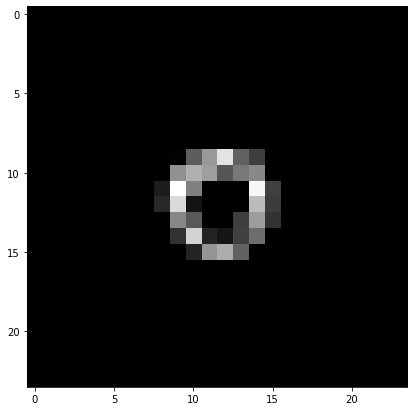

center1_basic


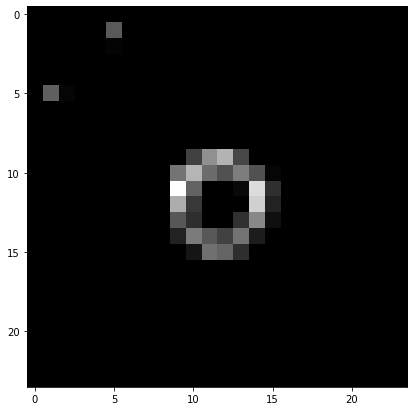

center_double


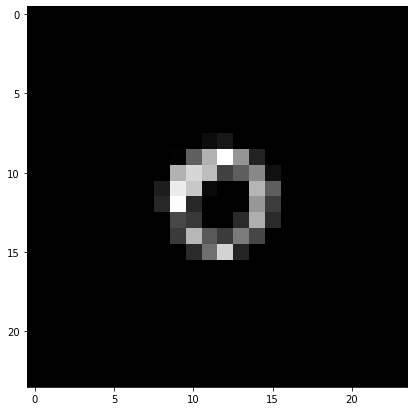

colorpoor


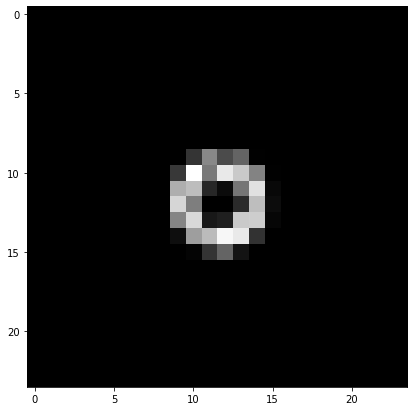

dotmissing_UpperLeft


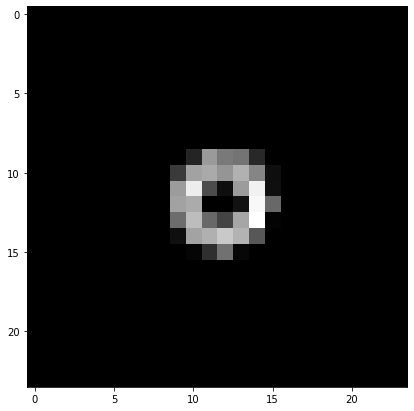

inkcut_only remain UpperLeft


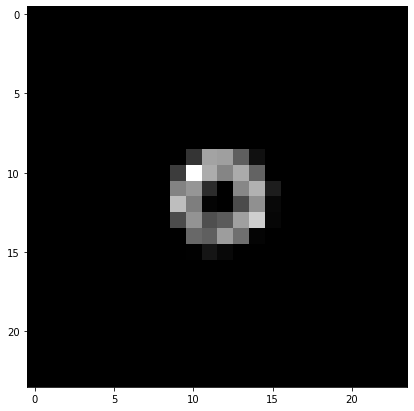

line Bottom


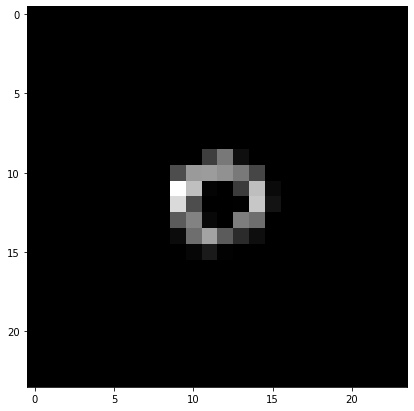

In [120]:
feature_map_num = 600

show_feature_map(src='D:/pics_test/train_result/normal/0_20220210195749_2-0.bmp', feature_map_num=feature_map_num, figsize=7, description='normal')
show_feature_map(src='D:/pics_test/train_result/center/0_20220211080243_12-0.bmp', feature_map_num=feature_map_num, figsize=7, description='center1_basic')
show_feature_map(src='D:/pics_test/train_result/center/0_20220210203315_2-0.bmp', feature_map_num=feature_map_num, figsize=7, description='center_double')
show_feature_map(src='D:/pics_test/train_result/colorpoor/0_20220122051448_8-0.bmp', feature_map_num=feature_map_num, figsize=7, description='colorpoor')
show_feature_map(src='D:/pics_test/train_result/dotmissing/0_20220122051523_9-0.bmp', feature_map_num=feature_map_num, figsize=7, description='dotmissing_UpperLeft')
show_feature_map(src='D:/pics_test/train_result/inkcut/0_20220122033639_3-0.bmp', feature_map_num=feature_map_num, figsize=7, description='inkcut_only remain UpperLeft')
show_feature_map(src='D:/pics_test/train_result/line/0_20220210194522_2-0.bmp', feature_map_num=feature_map_num, figsize=7, description='line Bottom')